In [1]:
# import brewer2mpl
# import pandas as pd
# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import *
# import matplotlib.gridspec as gridspec
# from matplotlib.gridspec import *
# from scipy import *
# import scipy.spatial.distance as distance
# import scipy.cluster.hierarchy as sch
# import argparse
# import umap
# import numpy as np
# # from mnist import MNIST
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# sns.set(style='white', context='poster')
# import sklearn.preprocessing
# import hdbscan
# import os

In [2]:
## Load in metada tafile
# 1. read metadata;
# smp_2_size, smp_2_donor
smp_2_size = {}
smp_2_donor = {}
smp_2_species = {}
smp_2_align = {}
species_2_phylum = {}
smp_2_phylum={}
Filtered_Species_smplist={}
Filtered_Species_donorlist={}
Filtered_Species_sizelist={}
with open('../Intermediary-files/filtered_samples.csv') as file:
    for line in file:
        if 'GenomeSize' not in line:
            smp, sp, size, donor, align, phylum = line.strip().split(',')[0],line.strip().split(',')[1], int(line.strip().split(',')[2]), line.strip().split(',')[3],line.strip().split(',')[4],line.strip().split(',')[7]
            smp_2_size[smp] = size
            smp_2_donor[smp] = donor
            smp_2_species[smp]=sp
            smp_2_align[smp]=align
            smp_2_phylum[smp]=phylum
            species_2_phylum[sp]=phylum
            if sp not in Filtered_Species_smplist:
                Filtered_Species_smplist[sp]=[]
                Filtered_Species_donorlist[sp]={}
                Filtered_Species_sizelist[sp]=[]
            Filtered_Species_smplist[sp].append(smp)
            Filtered_Species_sizelist[sp].append(size)
            if donor not in Filtered_Species_donorlist[sp]:
                Filtered_Species_donorlist[sp][donor]=[]
            Filtered_Species_donorlist[sp][donor].append(smp)

In [11]:
## Read the files and construct a data structure
import os
species_list_on_a_tree=[]
with open('treefiles/species-name-order-on-tree.txt') as g:
    lines = g.readlines()
    for line in lines:
        id = line.split('\n')[0]
        species_list_on_a_tree.append(id)

isolates_by_species_predicted={}
species_system_ds = {}
DF_systems={}
for sp in species_list_on_a_tree:
    isolates_by_species_predicted[sp]=0
    species_system_ds[sp]={}
    for smp in Filtered_Species_smplist[sp]:
        file_path = '../Intermediary-files/defensefinder/phagedefense/' + smp + '_defense_finder_systems.tsv'
        if os.path.exists(file_path):
            isolates_by_species_predicted[sp] = isolates_by_species_predicted[sp]+1
            with open(file_path) as g:
                lines = g.readlines()
                dfdict_tmp={}
                for line in lines:
                    if line[:6] != 'sys_id':
                        tmp = line.split('\t')
                        maintype = tmp[1]
                        dfdict_tmp[maintype]=1
                        if maintype not in species_system_ds[sp]:
                            species_system_ds[sp][maintype]=0
                for maintype in dfdict_tmp:
                    species_system_ds[sp][maintype]=species_system_ds[sp][maintype]+1
                    DF_systems[maintype]=1

In [12]:
## Reproduce Figure S1E
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

heatmap_ds = []
dflist = list(DF_systems.keys())
# Randomize the order of the list
random.shuffle(dflist)

for sp in species_list_on_a_tree:
    tmp = []
    for df in dflist:
        if df in species_system_ds[sp]:
            ratio = species_system_ds[sp][df] / float(isolates_by_species_predicted[sp])
        else:
            ratio = 0

        if ratio == 0:
            tmp.append(-0.4)
        elif ratio < 0.2:
            tmp.append(0)
        elif ratio < 0.95:
            tmp.append(0.5)
        else:
            tmp.append(1)
    heatmap_ds.append(tmp)

heatmap_ds = np.array(heatmap_ds)

# # Define the four colors (RGB values) for the custom color map
# colors = [(1, 1, 1),  # white
#           (200 / 255, 230 / 255, 239 / 255),  # Blue
#           (90 / 255, 140 / 255, 180 / 255),  # Green
#           (10 / 255, 51 / 255, 102 / 255)]  # Orange

# # Create a custom color map
# cmap_name = 'custom_color_map'
# custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

# # Create DataFrame from heatmap data
# df_trans = pd.DataFrame(heatmap_ds)

# # Set font scale
# sns.set(font_scale=0.8)

# # Define grid settings
# grid_kws = {'width_ratios': (0.9, 0.03), 'wspace': 0.18}

# # Create the figure and axes
# fig, (ax, cbar_ax) = plt.subplots(1, 2, figsize=(35, 20), gridspec_kw=grid_kws)

# # Create the heatmap with custom color map
# ax = sns.heatmap(df_trans, ax=ax, cbar_ax=cbar_ax, cmap=custom_cmap,
#                  linewidths=0.01, linecolor='lightgray',
#                  cbar_kws={'orientation': 'vertical'})

# # Set y-axis labels horizontally
# ax.set_yticklabels(species_list_on_a_tree, rotation=0, fontsize=15, color="black")

# # Put y-axis labels on the right
# ax.yaxis.tick_right()

# # Set x-axis labels
# ax.set_xticklabels(dflist, rotation=90, ha='right', fontsize=15, color="black")

# # Set colorbar labels
# # cbar_ax.tick_params(labelsize=10, color="black")

# # Show the histogram
# fig.savefig('figures/FigureS1E.pdf', dpi=600, bbox_inches='tight')
# plt.show()


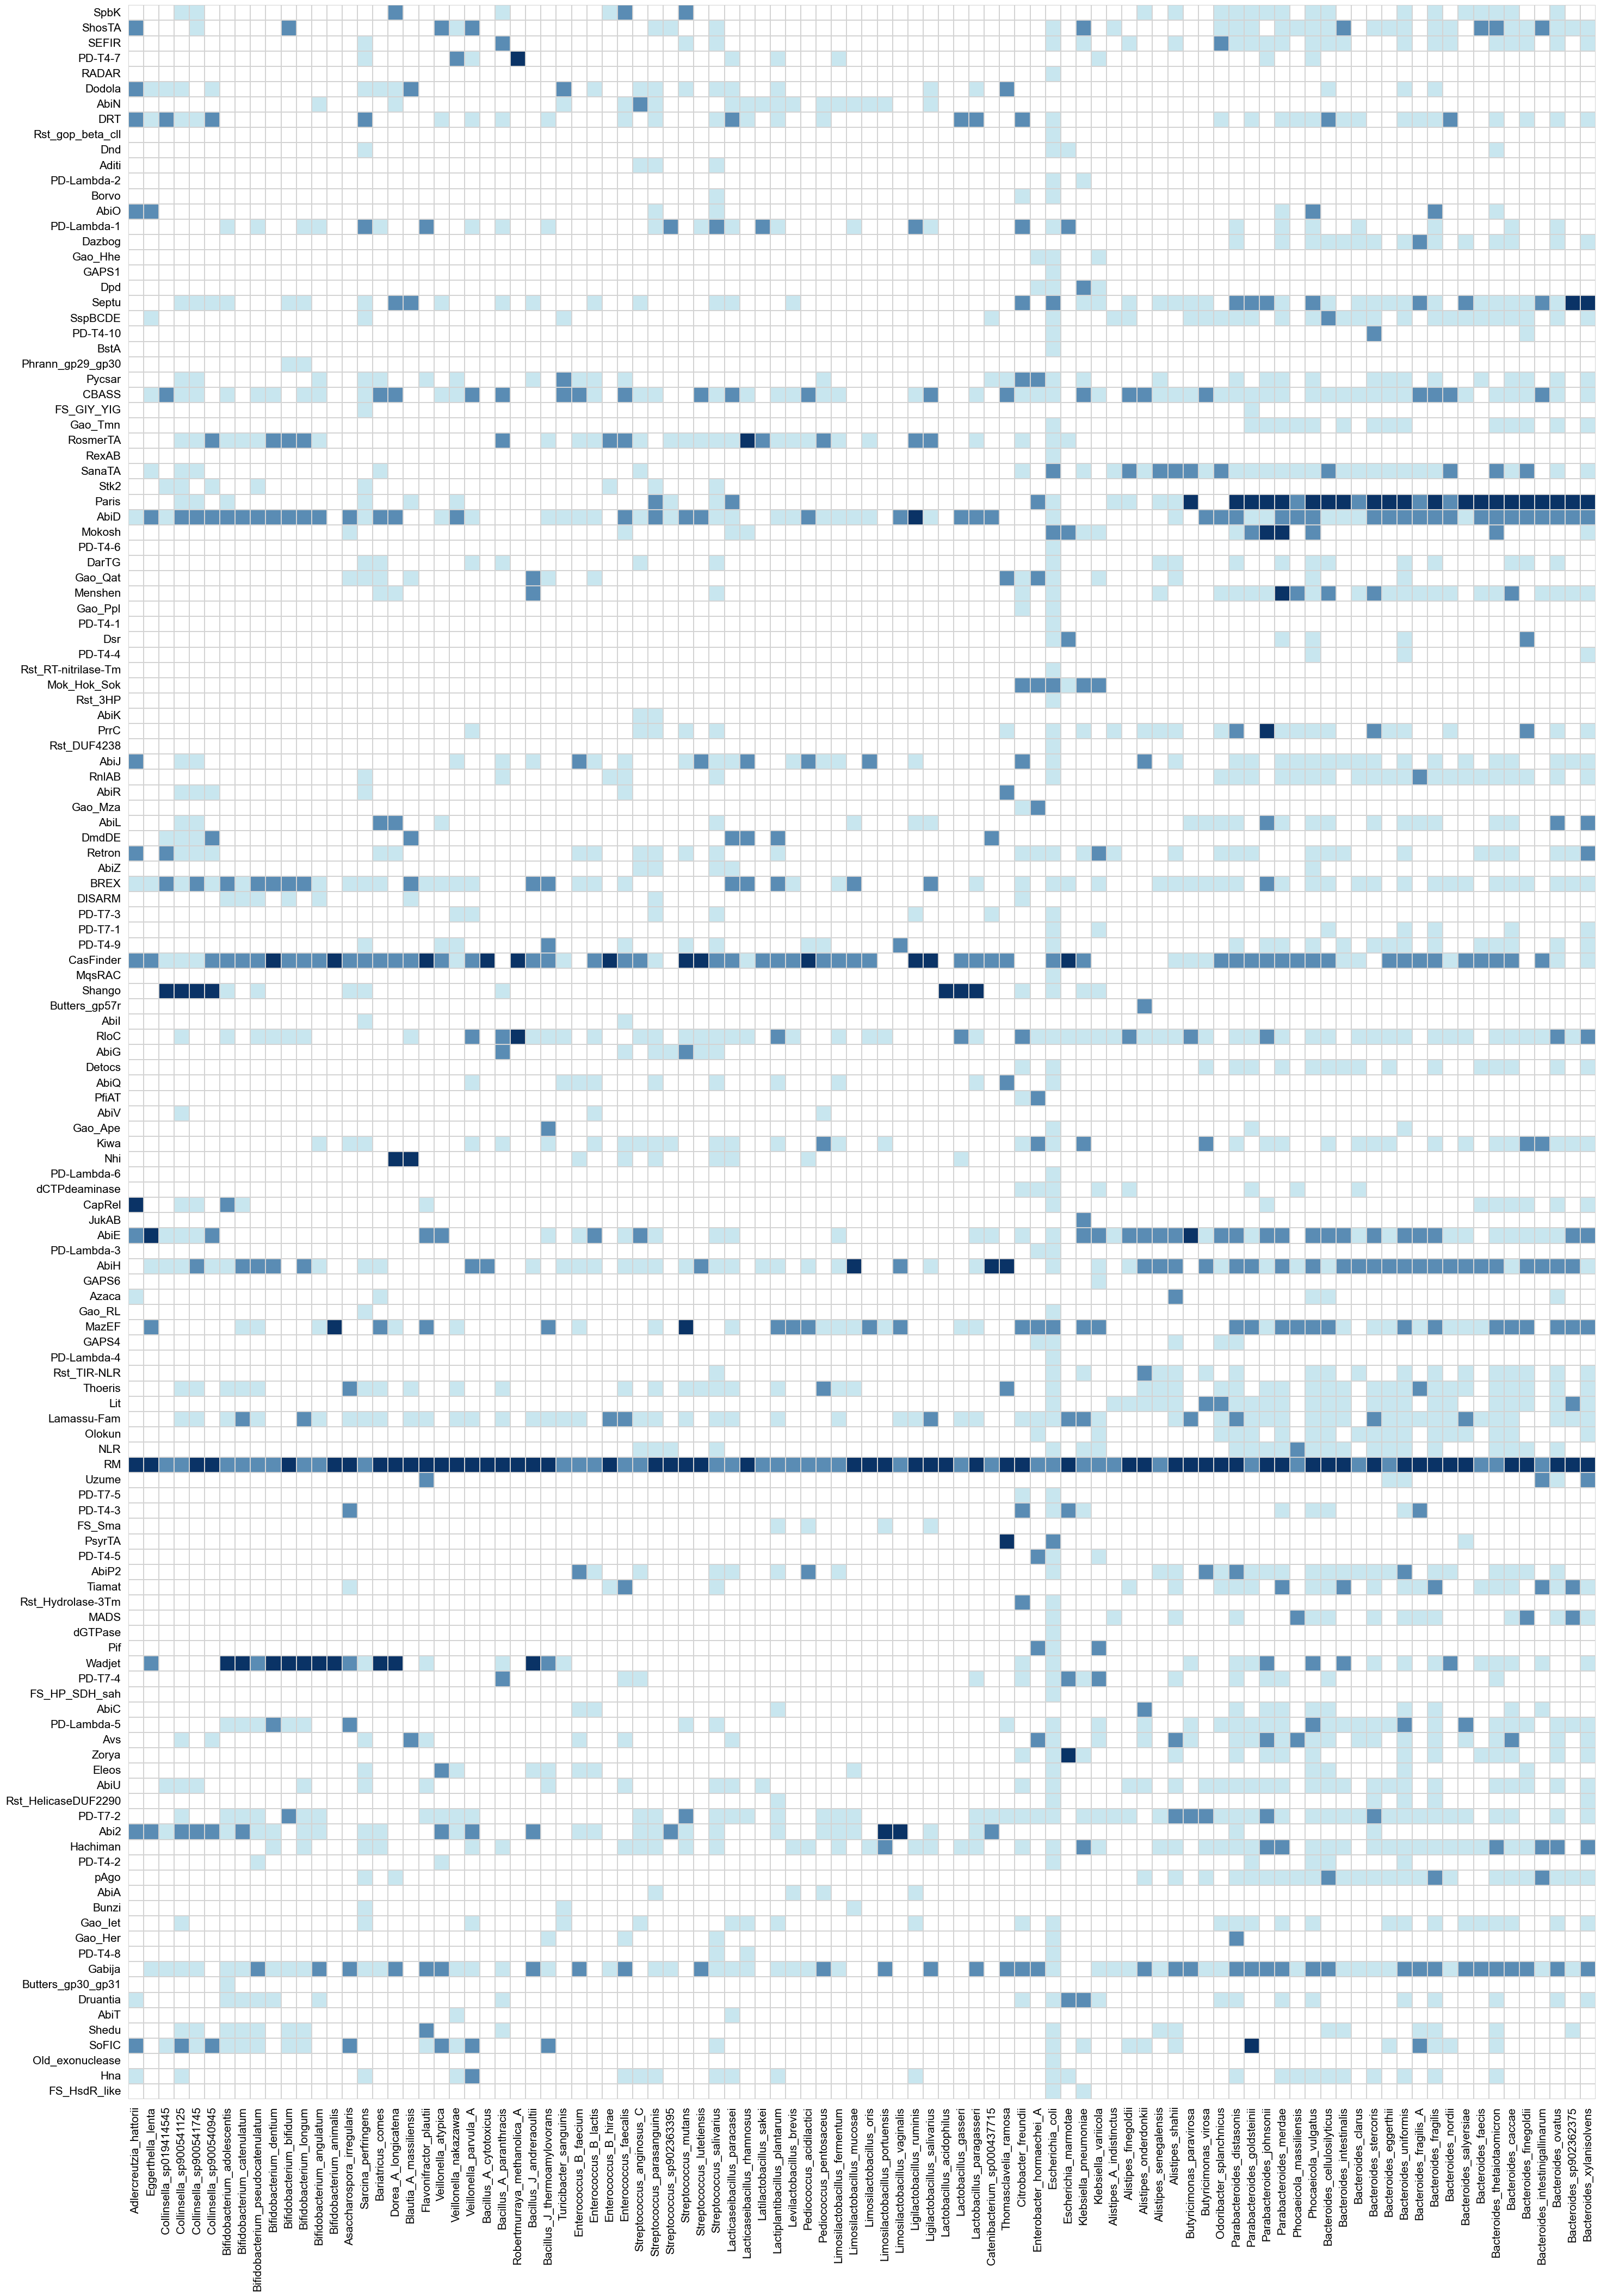

In [5]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

heatmap_ds = []
dflist = list(DF_systems.keys())
# Randomize the order of the list
random.shuffle(dflist)

for sp in species_list_on_a_tree:
    tmp = []
    for df in dflist:
        if df in species_system_ds[sp]:
            ratio = species_system_ds[sp][df] / float(isolates_by_species_predicted[sp])
        else:
            ratio = 0

        if ratio == 0:
            tmp.append(-0.4)
        elif ratio < 0.2:
            tmp.append(0)
        elif ratio < 0.95:
            tmp.append(0.5)
        else:
            tmp.append(1)
    heatmap_ds.append(tmp)

heatmap_ds = np.array(heatmap_ds)

# Define the four colors (RGB values) for the custom color map
colors = [(1, 1, 1),  # white
          (200 / 255, 230 / 255, 239 / 255),  # Blue
          (90 / 255, 140 / 255, 180 / 255),  # Green
          (10 / 255, 51 / 255, 102 / 255)]  # Orange

# Create a custom color map
cmap_name = 'custom_color_map'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

# Create DataFrame from heatmap data and rotate it
df_trans = pd.DataFrame(heatmap_ds).T  # Transpose to rotate

# Set font scale
sns.set(font_scale=0.8)

# Define grid settings
grid_kws = {'width_ratios': (0.9, 0.03), 'wspace': 0.18}

# Create the figure and axes
fig, ax = plt.subplots(figsize=(35, 50))

# Create the heatmap with custom color map
sns.heatmap(df_trans, ax=ax, cmap=custom_cmap,
            linewidths=0.01, linecolor='lightgray',
            cbar=False,  # Remove color bar
            xticklabels=species_list_on_a_tree, yticklabels=dflist[::-1],  # Reverse y-axis labels
            square=True)  # Ensure square cells

# Set x-axis labels
ax.set_xticklabels(species_list_on_a_tree, rotation=90, fontsize=15, color="black")

# Set y-axis labels
ax.set_yticklabels(dflist, rotation=0, ha='right', fontsize=15, color="black")

# Show the histogram
fig.savefig('figures/FigureS1E.pdf', dpi=600, bbox_inches='tight')
plt.show()


In [13]:
f = open('Table-S1xx.csv','w')
f.write('Ratio of isolates with the defense system')
for df in dflist:
    f.write(','+df)
f.write('\n')

ratios_inthe_pangenome=[]
for sp in species_list_on_a_tree:
    f.write(sp)
    for df in dflist:
        if df in species_system_ds[sp]:
            ratio = species_system_ds[sp][df] / float(isolates_by_species_predicted[sp])
            ratios_inthe_pangenome.append(ratio)
        else:
            ratio = 0
        f.write(','+str(ratio))
    f.write('\n')
f.close()

In [14]:
ratios_inthe_pangenome

[0.5384615384615384,
 0.7692307692307693,
 1.0,
 0.23076923076923078,
 0.15384615384615385,
 0.3076923076923077,
 0.8461538461538461,
 0.07692307692307693,
 0.3076923076923077,
 0.15384615384615385,
 0.07692307692307693,
 0.23076923076923078,
 1.0,
 0.23076923076923078,
 0.07692307692307693,
 0.23076923076923078,
 0.23076923076923078,
 0.2798165137614679,
 0.963302752293578,
 0.045871559633027525,
 0.41743119266055045,
 0.0045871559633027525,
 0.2981651376146789,
 0.03211009174311927,
 0.8027522935779816,
 0.3669724770642202,
 0.9770642201834863,
 0.07339449541284404,
 0.013761467889908258,
 0.06880733944954129,
 0.7935779816513762,
 0.11467889908256881,
 0.009174311926605505,
 0.17391304347826086,
 0.043478260869565216,
 0.043478260869565216,
 0.08695652173913043,
 0.21739130434782608,
 0.17391304347826086,
 0.08695652173913043,
 0.13043478260869565,
 0.391304347826087,
 0.7391304347826086,
 0.043478260869565216,
 0.043478260869565216,
 0.08695652173913043,
 1.0,
 0.21739130434782608,

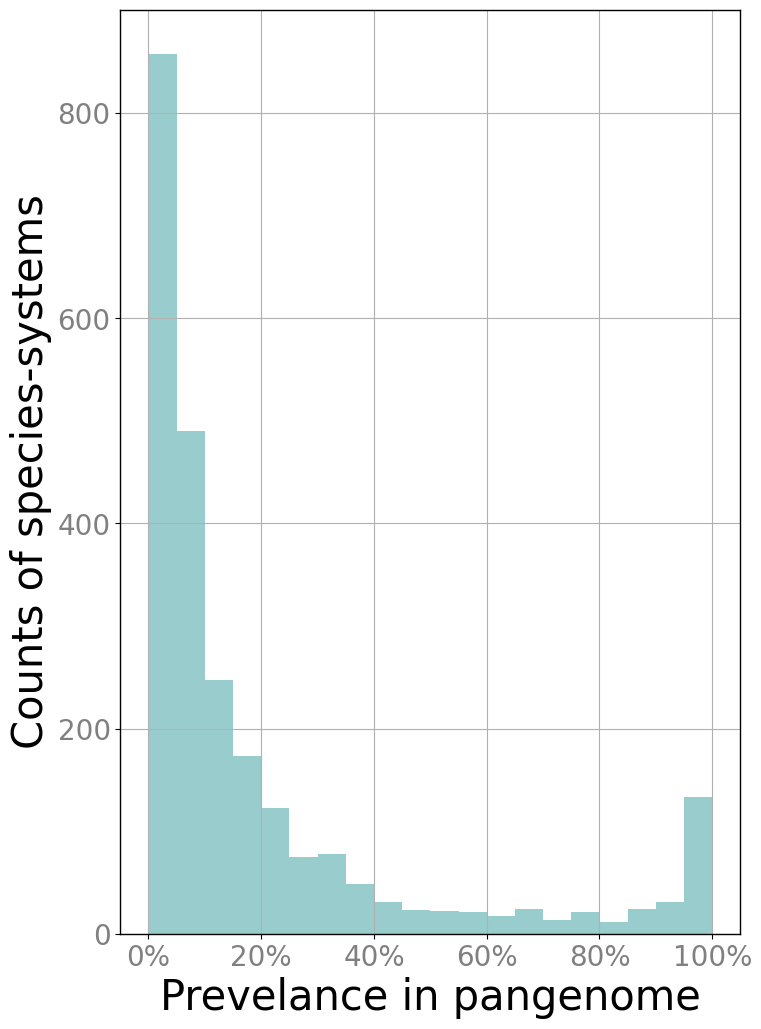

In [16]:
## Reproduce Figure S1D

import matplotlib.ticker as mtick
# Set the background color to white
ax.set_facecolor('white')
fig = plt.figure(1, figsize=(8, 12))
ax = fig.add_subplot(111)


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('black')    # change color
# plt.hist(df_sub, bins=100, color='mediumturquoise',alpha=0.5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=1)
c1 = 'teal'
c2 = ''
plt.yticks(fontsize=30,color="grey")
plt.xticks(fontsize=30,color="grey")

plt.hist(ratios_inthe_pangenome,color=c1,bins=20,density=False,alpha=0.4)
# plt.xlim([0,2000])
# plt.ylim([0,80])
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.grid()

plt.xlabel('Prevelance in pangenome',fontsize=30 )
plt.ylabel('Counts of species-systems',fontsize=30)

# plt.yscale('log')
plt.yticks(fontsize=20,color="grey")
plt.xticks(fontsize=20,color="grey")
# Show the histogram
fig.savefig('figures/FigureS1D.pdf', dpi=600, bbox_inches='tight')
plt.show()

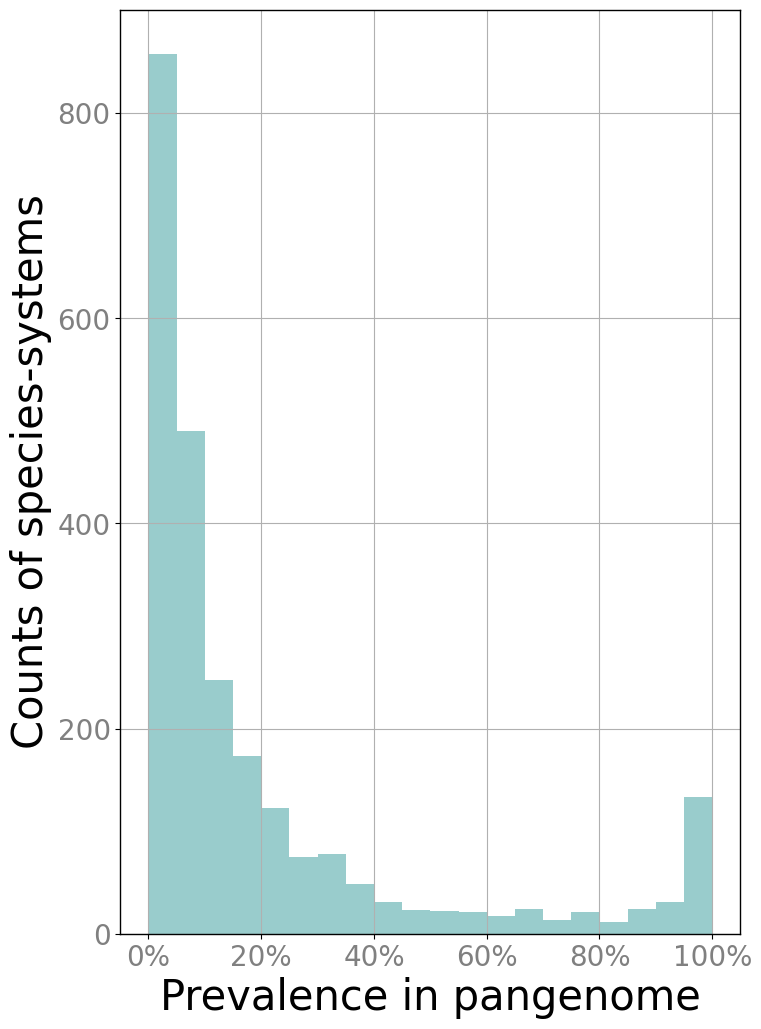

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig = plt.figure(1, figsize=(8, 12))
ax = fig.add_subplot(111)

# Set the background color to white
ax.set_facecolor('white')

# Setting up the spine color and width
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color('black')

# # Explicitly add tick marks on the x and y axis
# ax.xaxis.set_major_locator(mtick.AutoLocator())  # Automatic placement of ticks
# ax.yaxis.set_major_locator(mtick.AutoLocator())
# Explicitly setting tick parameters
# ax.tick_params(axis='x', direction='out', length=1, width=1, colors='black', grid_color='black', grid_alpha=0.5)
# ax.tick_params(axis='y', direction='out', length=1, width=1, colors='black', grid_color='black', grid_alpha=0.5)

# Optional: Define specific tick locations
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])  # For specific tick marks on x-axis
# ax.set_yticks([0, 20, 40, 60, 80, 100])  # For specific tick marks on y-axis

plt.xticks(fontsize=20, color="grey")
plt.yticks(fontsize=20, color="grey")

c1 = 'teal'
plt.hist(ratios_inthe_pangenome, color=c1, bins=20, density=False, alpha=0.4)

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.grid(True)

plt.xlabel('Prevalence in pangenome', fontsize=30)
plt.ylabel('Counts of species-systems', fontsize=30)

# Save and show the histogram
fig.savefig('figures/FigureS1D.pdf', dpi=600, bbox_inches='tight')
plt.show()


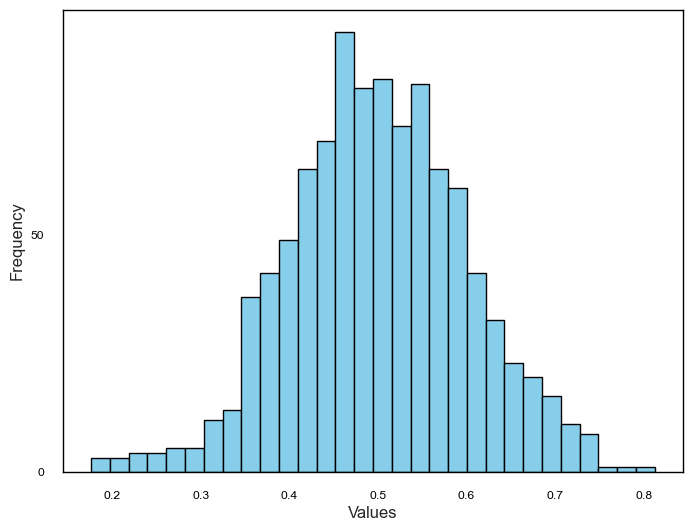

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Generating some random data
data = np.random.normal(loc=0.5, scale=0.1, size=1000)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram
ax.hist(data, bins=30, color='skyblue', edgecolor='black')

# Set the background color
ax.set_facecolor('white')

# Setting up the spine color and width
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color('black')

# Define specific major tick locations
ax.xaxis.set_major_locator(mtick.MultipleLocator(0.1))  # Major ticks at every 0.1
ax.yaxis.set_major_locator(mtick.MultipleLocator(50))   # Major ticks at every 50 counts

# Enable minor ticks
ax.minorticks_on()

# Set major tick parameters
ax.tick_params(axis='x', which='major', direction='out', length=10, width=2, colors='black')
ax.tick_params(axis='y', which='major', direction='out', length=10, width=2, colors='black')

# Set minor tick parameters
ax.tick_params(axis='x', which='minor', direction='out', length=5, width=1, colors='black')
ax.tick_params(axis='y', which='minor', direction='out', length=5, width=1, colors='black')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding axis labels
ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
